In [5]:
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd

## DATA SET 

This dataset comes from a consulting firm. Emails exchanged during the period 4 to 19 March 2019. 1174928 lines

Each line describes what a collaborator sent or received at MessDate. S/he sent (Id_Direction is equal to 1) or received an email from a contact (Id_Direction is equal to 2).

The interlocutor can be interne/externe/unidentified (PartnerTypeName).

The interaction involving the collaborator is defined by:

- GroupName1 : Post/Title of the collaborator

- RecipientName : The collaborator

- MessSize : message size in Mégabytes

- MessDate : Date+Hour

- Id_Direction : 1 for a sent email, 2 for a received email

- PartnerTypeName : the interlocutor may be either:      

 -        Internal
 -        Internet (external interlocutor)
 -        Unidentified local address (applications or server or cloud mail address)

- PartnerName : domain name if external interlocutor

- Recipient_Display : the interlocutor





In [6]:
df = pd.read_csv('dataset_UE_GTSNA.csv', sep=',', dtype='str')
df.head()

GroupName1             MessSize             MessDate  \
0     Senior  0,00990676879882813  04/03/2019 00:00:02   
1     Senior   0,0100250244140625  04/03/2019 00:00:02   
2    Manager   0,0445833206176758  04/03/2019 00:00:08   
3    Partner   0,0256938934326172  04/03/2019 00:00:13   
4    Partner   0,0256862640380859  04/03/2019 00:00:13   

                                    Subject Id_Direction  \
0  0de420e8cb4f25a853b2d42c27787d8691176975            2   
1  43cbcc2246e28d855c636fae99bbd0dd828ac276            2   
2  a60173eae76ea9bc97aa2f1d84bf78797c77a1f5            2   
3  c0eee27f5bb484585a79c5d9a0646097937c0091            2   
4  c0eee27f5bb484585a79c5d9a0646097937c0091            2   

              PartnerTypeName Id_Recipient Id_Regroup  \
0                    Internal          852       6674   
1                    Internal          852       6674   
2                    Internet         1113     593252   
3  Unidentified local address         1888     552279   
4  Unidentified local address         1888     552279   

                               Partner_Name  \
0  6d2830b1e76dc7300fce6745176601827d233de8   
1  6d2830b1e76dc7300fce6745176601827d233de8   
2  3793d3935a39a8038a8a8b27e00c3aa587395412   
3  97db2e51f36c0b207c8f6a4ecb488473238d04ae   
4  97db2e51f36c0b207c8f6a4ecb488473238d04ae   

                          Recipient_Display  \
0  0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
1  0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
2  77c570261748c351a2296ac47685450587bc7d2b   
3  4d48a3734ac25c0f71584f79716881f9529167f6   
4  4d48a3734ac25c0f71584f79716881f9529167f6   

                             Recipient_Name  
0  b4b419cd95026fd7f74cc90754ec02f40de14d85  
1  b4b419cd95026fd7f74cc90754ec02f40de14d85  
2  bec1a496d58aefeb626da2e7484e38657704fa19  
3  253b86e279f1ca0520ed2d4aeffa491ce0054a1c  
4  253b86e279f1ca0520ed2d4aeffa491ce0054a1c

In [7]:
df=df.sort_values(by = ['MessDate','Subject'])

In [8]:
df.head(100000).to_csv("mails_conseil_100000_sorted_MessDate.csv", header=True, index=False)

In [9]:
# how many Nan values?
df['GroupName1'].isna().sum()

0

In [10]:
df.describe()

GroupName1            MessSize             MessDate  \
count     1174928             1174928              1174928   
unique         10              235082               393561   
top         Staff  0,0956134796142578  14/03/2019 09:47:40   
freq       322873                1428                 1429   

                                         Subject Id_Direction PartnerTypeName  \
count                                     972790      1174928         1174928   
unique                                    197133            2               5   
top     ef21206754712f4c610e540f5a94bffb22e3a008            2        Internal   
freq                                       15262       740744          702932   

       Id_Recipient Id_Regroup                              Partner_Name  \
count       1174928    1174928                                   1174928   
unique         1606      38976                                     21435   
top           15878     556984  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
freq          52164      50606                                    469039   

                               Recipient_Display  \
count                                    1174928   
unique                                     36144   
top     1ab391535889786155c4d3008e57e05931d8ae62   
freq                                       35860   

                                  Recipient_Name  
count                                    1174928  
unique                                     46928  
top     0f4c3bb7f8fa541b3c295690f593f138a268c646  
freq                                       37159

1.17 million de lines

In [11]:
df[['Recipient_Name','MessDate','Recipient_Display','Subject']].groupby(["Subject",'MessDate'], as_index=False).count()

Subject             MessDate  \
0       00002ab407c3e60791d1ab3a4c85acfa031248fd  08/03/2019 19:34:37   
1       00002ab407c3e60791d1ab3a4c85acfa031248fd  09/03/2019 16:52:42   
2       00002ab407c3e60791d1ab3a4c85acfa031248fd  09/03/2019 16:52:43   
3       00002f551689bad3b6b2ad809e7a5d49a9bd1d2b  04/03/2019 20:04:26   
4       00002f551689bad3b6b2ad809e7a5d49a9bd1d2b  04/03/2019 20:04:32   
...                                          ...                  ...   
509949  fffd9335dc8b884714a54dd361376e5e1f106d80  05/03/2019 15:10:22   
509950  fffde77881233f89815a8c85b73ecac7440b6ded  04/03/2019 10:10:54   
509951  fffdffe8684953ba5aa867485187b2a8992d3558  13/03/2019 18:53:13   
509952  fffdffe8684953ba5aa867485187b2a8992d3558  13/03/2019 19:11:24   
509953  ffff4dfe62b83b34d7871434e72ac88c90700c2a  19/03/2019 09:44:44   

        Recipient_Name  Recipient_Display  
0                    2                  2  
1                    3                  3  
2                    1                  1  
3                    1                  1  
4                    1                  1  
...                ...                ...  
509949               1                  1  
509950               1                  1  
509951               1                  1  
509952               1                  1  
509953               1                  1  

[509954 rows x 4 columns]

509954 messages (unique pairs ["Subject",'MessDate']) in the dataset. 

An email can be described by several lines.

Example1: if A and B are two internal colleagues, there will be 1 line dedicated to A and 1 line dedicated to B for the same message 
~~~
Manager | 04/03/2019 00:03 | 1 | B | A | 4bb26edab1c7a7bd212a86e4308d128af11e117c
Senior  | 04/03/2019 00:03 | 2 | A | B | 4bb26edab1c7a7bd212a86e4308d128af11e117c

~~~

Example2: if A, B, C are 3 colleagues and they all receive the same message from an external partner, there will be 3 lines with same s(ubject,date) with id_Direction = 2.


### DATA UNDERSTAND

## Roles

In [12]:
df['GroupName1'].unique()

array(['Senior', 'Manager', 'Partner', 'Staff', 'Senior Manager',
       'Director', 'Junior Staff', 'Title:[no value]',
       'Administrative Staff', 'Assistant Manager'], dtype=object)

In [13]:
# Number of lines per role
df[['GroupName1','Id_Recipient']].groupby('GroupName1').size()

GroupName1
Administrative Staff     51942
Assistant Manager         9009
Director                 81180
Junior Staff             21187
Manager                 232904
Partner                 120964
Senior                  206667
Senior Manager          121972
Staff                   322873
Title:[no value]          6230
dtype: int64

In [14]:
# Number of people per role
df[['GroupName1','Id_Recipient']].drop_duplicates().groupby('GroupName1').size()

GroupName1
Administrative Staff     30
Assistant Manager         4
Director                 65
Junior Staff            116
Manager                 200
Partner                  64
Senior                  316
Senior Manager          114
Staff                   647
Title:[no value]         51
dtype: int64

In [15]:
df[['Id_Recipient']].drop_duplicates().shape

(1606, 1)

## Interactions

In [16]:
# Nb of interactions with different people per collaborator
df[["Recipient_Display","Recipient_Name"]].groupby("Recipient_Name").describe()

Recipient_Display         \
                                                     count unique   
Recipient_Name                                                      
0000ef79b21a7e73725841cb8355361fced8457e                 1      1   
000127ddacef5499dc311db7cdcdc41477a2c749                 5      3   
0002a573dcdbda5e716d26500c33c999c5c0e6af                 8      5   
0003192c3e74f2e107f9815c6e00eec9db6fd524                 1      1   
0004309fe945da9a82b18c0a4df07747fed36c7c                 2      2   
...                                                    ...    ...   
fffbcd57cb07cabbd6387362b2d77ab2571b7536                 3      1   
fffbda0c832a0ff89a203d394d53193d51ec0bea                 1      1   
fffc593847ec88edd63d87dc855a41df890c7fe0                 3      1   
fffca35584436327634906d4563b6f0283a3fbd7                 2      2   
ffff619b6c198938d740670ab118fba5483acd95                 4      2   

                                                                                    \
                                                                               top   
Recipient_Name                                                                       
0000ef79b21a7e73725841cb8355361fced8457e  f01d7ddbbe3ae90e7223c67c35fdb03158e2da3f   
000127ddacef5499dc311db7cdcdc41477a2c749  8779838af0b40469a4c4575300b3d7c29c92ae39   
0002a573dcdbda5e716d26500c33c999c5c0e6af  2bc2dcc73b24505cf8cdec15e60bff2d536fc418   
0003192c3e74f2e107f9815c6e00eec9db6fd524  7f0bbc4bc9cdbe6a59b8feb1a99deb61da3dfd02   
0004309fe945da9a82b18c0a4df07747fed36c7c  b1324c42571a41e64c1189fc16e700b0f7ab750e   
...                                                                            ...   
fffbcd57cb07cabbd6387362b2d77ab2571b7536  b07d1bb755cbb28617579fb4b9923edad4754bd0   
fffbda0c832a0ff89a203d394d53193d51ec0bea  7bce578fe866857b379c210a0bca4bdf0e1a3e9c   
fffc593847ec88edd63d87dc855a41df890c7fe0  df32d3d2ca3b3ebdc3edea9a917d3db4b961ff6f   
fffca35584436327634906d4563b6f0283a3fbd7  991006e98e5a91ea149136095281bac663ac40fc   
ffff619b6c198938d740670ab118fba5483acd95  2b5b6fb7400a707765e0090b09fc0a48125d50bc   

                                               
                                         freq  
Recipient_Name                                 
0000ef79b21a7e73725841cb8355361fced8457e    1  
000127ddacef5499dc311db7cdcdc41477a2c749    3  
0002a573dcdbda5e716d26500c33c999c5c0e6af    3  
0003192c3e74f2e107f9815c6e00eec9db6fd524    1  
0004309fe945da9a82b18c0a4df07747fed36c7c    1  
...                                       ...  
fffbcd57cb07cabbd6387362b2d77ab2571b7536    3  
fffbda0c832a0ff89a203d394d53193d51ec0bea    1  
fffc593847ec88edd63d87dc855a41df890c7fe0    3  
fffca35584436327634906d4563b6f0283a3fbd7    1  
ffff619b6c198938d740670ab118fba5483acd95    3  

[46928 rows x 4 columns]

In [17]:
#dictionary for Id_recipient and GroupName
graphdf=df[(df.PartnerTypeName == "Internal")]
graphdfrecv=graphdf[(graphdf.Id_Direction == "2")]
df_group_id=graphdf[["GroupName1","Id_Recipient"]]

In [18]:
graphdf['MessDate'] =  pd.to_datetime(graphdf['MessDate'])
graphdf['Dates'] = pd.to_datetime(graphdf['MessDate']).dt.date
graphdf['Time'] = pd.to_datetime(graphdf['MessDate']).dt.time
graphdf['hour'] = graphdf['MessDate'].dt.hour
graphdf['day_of_week'] = graphdf['MessDate'].dt.day_name()


C:\Users\ishit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ishit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ishit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [19]:
# Number of people per role -total 
graphdf['day_of_week'].value_counts()

Wednesday    167234
Tuesday      120445
Friday       119011
Monday       118971
Sunday        65330
Thursday      61105
Saturday      50836
Name: day_of_week, dtype: int64

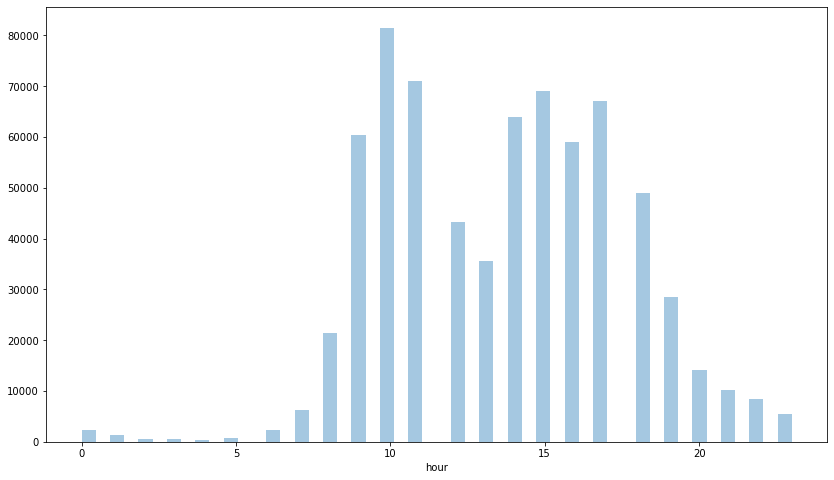

In [20]:
# distribution of communication by emails per hours of the day 
import seaborn as sns
filter_data = graphdf.dropna(subset=['hour'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['hour'], kde=False)

<Figure size 2160x720 with 0 Axes>

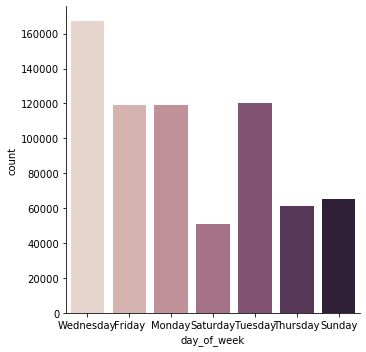

In [21]:
import seaborn as sns
plt.figure(figsize=(30,10)) 
sns.catplot(x="day_of_week", kind="count", palette="ch:.10", data=graphdf)

### DATA PROCESSING

In [22]:
dict_group_recID={}
repeat=[]

for row in df_group_id.iterrows():
    idg=str(row[1].str.split()[1])
    group_name=str(row[1].str.split()[0])
    if idg in dict_group_recID and dict_group_recID[idg]!=group_name:
        if idg!="['1008154']":
            print("diff group for same ID")
            print(idg, group_name, dict_group_recID[idg])
            if idg not in repeat:
                repeat.append(idg)
    else:
        dict_group_recID[idg]=group_name
print("total employees:", len(dict_group_recID))
print("double values for employees: ",len(repeat))

total employees: 1600
double values for employees:  0


In [23]:
otherdf_group_id=df[["GroupName1","Id_Recipient"]]
IDs=[]
for row in otherdf_group_id.iterrows():
    idg=str(row[1].str.split()[1])
    int_id=int(idg[2:-2])
    if int_id not in IDs:
        IDs.append(int_id)
    group_name=str(row[1].str.split()[0])
    if idg in dict_group_recID and dict_group_recID[idg]!=group_name:
        if idg!="['1008154']":
            #print(idg, group_name, dict_group_recID[idg])
            if idg not in repeat:
                repeat.append(idg)
    else:
        dict_group_recID[idg]=group_name
print("total employees:", len(dict_group_recID))
print("double values for employees: ",len(repeat))

total employees: 1606
double values for employees:  0


In [24]:
IDs.sort()
print(len(IDs))
print(IDs)

1606
[680, 681, 682, 683, 684, 685, 686, 687, 688, 690, 691, 692, 693, 694, 695, 696, 697, 698, 701, 702, 703, 706, 707, 708, 709, 710, 712, 713, 714, 715, 716, 717, 718, 719, 722, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 749, 750, 751, 752, 753, 755, 757, 758, 759, 760, 761, 762, 764, 765, 766, 767, 768, 769, 772, 773, 774, 776, 777, 779, 780, 782, 783, 784, 785, 787, 788, 790, 791, 793, 794, 795, 799, 800, 801, 802, 804, 805, 806, 808, 811, 813, 814, 815, 816, 817, 818, 820, 823, 824, 826, 827, 828, 829, 830, 832, 834, 836, 837, 838, 839, 841, 844, 845, 847, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 864, 865, 866, 868, 869, 870, 872, 873, 875, 876, 877, 878, 879, 880, 881, 882, 884, 885, 886, 890, 891, 892, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 909, 913, 924, 932, 936, 937, 939, 940, 948, 955, 959, 960, 962, 969, 970, 973, 977, 982, 987, 991, 992, 993, 994, 995, 996, 997,

In [25]:
#building recipient ID and recipient name correspondence
dictdf=graphdf[["Id_Recipient","Recipient_Name"]]

In [26]:
dict={}

duplicate=[]
for row in dictdf.iterrows():
    rec_name=str(row[1].str.split()[1])
    idr=str(row[1].str.split()[0])
    if rec_name in dict and dict[rec_name]!=idr:
        if rec_name not in duplicate:
            duplicate.append(rec_name)
    else:
        dict[rec_name]=idr
print("total recipient names:", len(dict))
print("double values for recipient names: ",len(duplicate))

total recipient names: 25913
double values for recipient names:  17023


In [27]:
print(dict)

{"['b4b419cd95026fd7f74cc90754ec02f40de14d85']": "['852']", "['ae480cf987c8c8b1c3430d66359f67d838ce462f']": "['1336894']", "['645f10f71c7d5e050dabee172d0aa07f40413a8e']": "['1014424']", "['031c2220cade22cd67b6ec200668e1c86f570889']": "['772']", "['665751c47b55cb0f3c4fc9376db0c3c7109f8d99']": "['719']", "['f78c572f9a770e854447bcc0a4fc06401e20f8ce']": "['728']", "['08b3f4586910a0b750de34b049a51ba43cf947e0']": "['1199']", "['6630f39bc73277bcf5d54da88a21520be8f672cc']": "['13486']", "['28dca38ae2c42d2855a4ef794cb95f6e12350b2e']": "['1378156']", "['bbcb57c9587cd21bf0df0b9210cf631dd600f03d']": "['1052']", "['a007a8c849c81b9d87e6e0a2462a36b7e08b6637']": "['1464']", "['3ba11a1ece43cf8bd7e327093cd03a919df53873']": "['1373']", "['b86d27955c41dff75911746d73c02ee0fc4b14d1']": "['1501']", "['0d9c97cb0bc172de94e5521302ea6c4d8e27f076']": "['1683']", "['7363b2f5f653295d7c0bfb1de5be80c023a843dd']": "['6972']", "['a058cf31ee63447abb2c5248f737257af00e8656']": "['1175']", "['dd79084f865a4f62e1740d3a5f4f16

In [28]:
#finding the correspondence between Recipient_Display and the Group Name and IDs
recipient_display_group=[]
recipient_display_id=[]
count=0
l= graphdf[["Recipient_Display"]]
for a in graphdf[["Recipient_Display"]].values:
    if str(a) not in dict:
        recipient_display_group.append("None")
        recipient_display_id.append("None")
        count+=1
    else:

        ID=dict[str(a)]
        group_name=dict_group_recID[ID]
        a=group_name.replace("'","")
        b=group_name.replace(",","")
        b=b[2:-2]
        li=b.split(" ")
        if len(li)==2:
            b=li[0][:-1]+" "+li[1][1:]
      
        recipient_display_group.append(b)
        recipient_display_id.append(int(ID[2:-2]))
        
print(len(l))
print(len(recipient_display_group))
print(count)


702932
702932
177319


In [29]:
print(recipient_display_group.count("Title:[no value]"))

6187


In [30]:
graphdfne=graphdf.assign( Recipient_Display_Group=recipient_display_group)
graphdfnew=graphdfne.assign( Recipient_Display_ID=recipient_display_id)
graphdfnew

GroupName1             MessSize            MessDate  \
0                Senior  0,00990676879882813 2019-04-03 00:00:02   
1                Senior   0,0100250244140625 2019-04-03 00:00:02   
48                Staff   0,0511951446533203 2019-04-03 00:01:03   
49                Staff   0,0611381530761719 2019-04-03 00:01:04   
50               Senior   0,0104150772094727 2019-04-03 00:01:04   
...                 ...                  ...                 ...   
1174920           Staff     10,5279741287231 2019-03-19 23:59:03   
1174921  Senior Manager     10,0429849624634 2019-03-19 23:59:20   
1174923           Staff     10,0752859115601 2019-03-19 23:59:33   
1174924  Senior Manager     5,76295566558838 2019-03-19 23:59:33   
1174926           Staff     5,77865791320801 2019-03-19 23:59:40   

                                          Subject Id_Direction  \
0        0de420e8cb4f25a853b2d42c27787d8691176975            2   
1        43cbcc2246e28d855c636fae99bbd0dd828ac276            2   
48       0e567ffc71c136761387febb8c869026fe1d01f3            1   
49       0e567ffc71c136761387febb8c869026fe1d01f3            2   
50       4e6b827469ada1ecff99e52afe1f171024bee5c1            2   
...                                           ...          ...   
1174920  d50150fe40834b36b3b00143a44bef8739eb83d1            2   
1174921  a87260372529cbefc1f1fcb98fa344b623d8872f            1   
1174923  a87260372529cbefc1f1fcb98fa344b623d8872f            2   
1174924  e07e8cec7f1fa3a230c8602bbad0bb04a4014514            1   
1174926  e07e8cec7f1fa3a230c8602bbad0bb04a4014514            2   

        PartnerTypeName Id_Recipient Id_Regroup  \
0              Internal          852       6674   
1              Internal          852       6674   
48             Internal      1336894    1336894   
49             Internal      1336894    1336894   
50             Internal          852       6674   
...                 ...          ...        ...   
1174920        Internal      1173723       1685   
1174921        Internal         1685    1173723   
1174923        Internal      1173723       1685   
1174924        Internal         1685    1173723   
1174926        Internal      1173723       1685   

                                     Partner_Name  \
0        6d2830b1e76dc7300fce6745176601827d233de8   
1        6d2830b1e76dc7300fce6745176601827d233de8   
48       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
49       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
50       6d2830b1e76dc7300fce6745176601827d233de8   
...                                           ...   
1174920  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174921  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174923  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174924  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174926  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   

                                Recipient_Display  \
0        0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
1        0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
48       ae480cf987c8c8b1c3430d66359f67d838ce462f   
49       ae480cf987c8c8b1c3430d66359f67d838ce462f   
50       0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
...                                           ...   
1174920  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174921  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174923  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174924  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174926  27a0dafd0101f368a5881378aef66a1fa5403e38   

                                   Recipient_Name       Dates      Time  hour  \
0        b4b419cd95026fd7f74cc90754ec02f40de14d85  2019-04-03  00:00:02     0   
1        b4b419cd95026fd7f74cc90754ec02f40de14d85  2019-04-03  00:00:02     0   
48       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:01:03     0   
49       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:01:04     0   
50       b4b419cd95026fd7f74cc90754ec02f40de14d85  2019-04-03  00:01:04     0   
...                           

In [43]:
lastdf=graphdfnew[(graphdfnew.Id_Direction == "2")]
lastdf

GroupName1             MessSize            MessDate  \
0                      Senior  0,00990676879882813 2019-04-03 00:00:02   
1                      Senior   0,0100250244140625 2019-04-03 00:00:02   
49                      Staff   0,0611381530761719 2019-04-03 00:01:04   
50                     Senior   0,0104150772094727 2019-04-03 00:01:04   
52                   Director   0,0190238952636719 2019-04-03 00:01:44   
...                       ...                  ...                 ...   
1174915                 Staff     57,3246335983276 2019-03-19 23:58:46   
1174918  Administrative Staff   0,0219230651855469 2019-03-19 23:58:57   
1174920                 Staff     10,5279741287231 2019-03-19 23:59:03   
1174923                 Staff     10,0752859115601 2019-03-19 23:59:33   
1174926                 Staff     5,77865791320801 2019-03-19 23:59:40   

                                          Subject Id_Direction  \
0        0de420e8cb4f25a853b2d42c27787d8691176975            2   
1        43cbcc2246e28d855c636fae99bbd0dd828ac276            2   
49       0e567ffc71c136761387febb8c869026fe1d01f3            2   
50       4e6b827469ada1ecff99e52afe1f171024bee5c1            2   
52       9664a8247f1fe9d2d0b4bafd56d113dae405001a            2   
...                                           ...          ...   
1174915  9d231eecb9005c995281e7073656c524968da9e9            2   
1174918  748e633617d6a8a236d49844db1dd84330ec59b5            2   
1174920  d50150fe40834b36b3b00143a44bef8739eb83d1            2   
1174923  a87260372529cbefc1f1fcb98fa344b623d8872f            2   
1174926  e07e8cec7f1fa3a230c8602bbad0bb04a4014514            2   

        PartnerTypeName Id_Recipient Id_Regroup  \
0              Internal          852       6674   
1              Internal          852       6674   
49             Internal      1336894    1336894   
50             Internal          852       6674   
52             Internal      1014424       7184   
...                 ...          ...        ...   
1174915        Internal      1173723       1685   
1174918        Internal         1178       7309   
1174920        Internal      1173723       1685   
1174923        Internal      1173723       1685   
1174926        Internal      1173723       1685   

                                     Partner_Name  \
0        6d2830b1e76dc7300fce6745176601827d233de8   
1        6d2830b1e76dc7300fce6745176601827d233de8   
49       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
50       6d2830b1e76dc7300fce6745176601827d233de8   
52       6d2830b1e76dc7300fce6745176601827d233de8   
...                                           ...   
1174915  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174918  6d2830b1e76dc7300fce6745176601827d233de8   
1174920  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174923  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174926  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   

                                Recipient_Display  \
0        0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
1        0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
49       ae480cf987c8c8b1c3430d66359f67d838ce462f   
50       0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
52       c672b746633470d05577dddf2ec6365fe0321631   
...                                           ...   
1174915  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174918  a307782610345bc44170ee41acb2ba7f4f3bcfd9   
1174920  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174923  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174926  27a0dafd0101f368a5881378aef66a1fa5403e38   

                                   Recipient_Name       Dates      Time  hour  \
0        b4b419cd95026fd7f74cc90754ec02f40de14d85  2019-04-03  00:00:02     0   
1        b4b419cd95026fd7f74cc90754ec02f40de14d85  2019-04-03  00:00:02     0   
49       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:01:04     0   
50       b4b419cd95026fd7f74cc90754ec02f40de14d85  2019-04-03  00:01:04     0   
52       645f10f71c7d5e050dabee172d0aa07f4041

In [46]:
#one on one communications
lastdf[['Recipient_Display_Group','Subject','MessDate','GroupName1']].groupby(["Subject", "MessDate"], as_index=False).count()

Subject            MessDate  \
0       00002ab407c3e60791d1ab3a4c85acfa031248fd 2019-08-03 19:34:37   
1       00002ab407c3e60791d1ab3a4c85acfa031248fd 2019-09-03 16:52:43   
2       00003a4de5108ae2ede4ce8d037fe9f8d6581ceb 2019-04-03 15:11:24   
3       00004c1dd9b8237f119538227b4655f6b09befd4 2019-06-03 10:21:15   
4       000099983eda078fc3425790209a81201131cd20 2019-06-03 10:49:16   
...                                          ...                 ...   
177145  fffd75bbfac4bdf2ddee4bd9b4e85af95b3bfd5c 2019-03-15 08:28:02   
177146  fffd75bbfac4bdf2ddee4bd9b4e85af95b3bfd5c 2019-03-15 09:28:36   
177147  fffd75bbfac4bdf2ddee4bd9b4e85af95b3bfd5c 2019-03-15 09:49:17   
177148  fffd75bbfac4bdf2ddee4bd9b4e85af95b3bfd5c 2019-03-18 09:10:47   
177149  fffd75bbfac4bdf2ddee4bd9b4e85af95b3bfd5c 2019-03-18 09:10:48   

        Recipient_Display_Group  GroupName1  
0                             2           2  
1                             1           1  
2                             1           1  
3                             1           1  
4                             1           1  
...                         ...         ...  
177145                        3           3  
177146                        3           3  
177147                        4           4  
177148                        1           1  
177149                        3           3  

[177150 rows x 4 columns]

In [31]:
## cleaning the data
mydf=graphdfnew.loc[graphdfnew['Recipient_Display_Group'] != "None"]
#mydf[["GroupName1","Id_Direction","Recipient_Display_Group"]]
mydf

GroupName1            MessSize            MessDate  \
48                Staff  0,0511951446533203 2019-04-03 00:01:03   
49                Staff  0,0611381530761719 2019-04-03 00:01:04   
60              Manager  0,0353221893310547 2019-04-03 00:03:14   
61               Senior  0,0477132797241211 2019-04-03 00:03:15   
67                Staff  0,0530796051025391 2019-04-03 00:04:13   
...                 ...                 ...                 ...   
1174920           Staff    10,5279741287231 2019-03-19 23:59:03   
1174921  Senior Manager    10,0429849624634 2019-03-19 23:59:20   
1174923           Staff    10,0752859115601 2019-03-19 23:59:33   
1174924  Senior Manager    5,76295566558838 2019-03-19 23:59:33   
1174926           Staff    5,77865791320801 2019-03-19 23:59:40   

                                          Subject Id_Direction  \
48       0e567ffc71c136761387febb8c869026fe1d01f3            1   
49       0e567ffc71c136761387febb8c869026fe1d01f3            2   
60       4bb26edab1c7a7bd212a86e4308d128af11e117c            1   
61       4bb26edab1c7a7bd212a86e4308d128af11e117c            2   
67       0e567ffc71c136761387febb8c869026fe1d01f3            1   
...                                           ...          ...   
1174920  d50150fe40834b36b3b00143a44bef8739eb83d1            2   
1174921  a87260372529cbefc1f1fcb98fa344b623d8872f            1   
1174923  a87260372529cbefc1f1fcb98fa344b623d8872f            2   
1174924  e07e8cec7f1fa3a230c8602bbad0bb04a4014514            1   
1174926  e07e8cec7f1fa3a230c8602bbad0bb04a4014514            2   

        PartnerTypeName Id_Recipient Id_Regroup  \
48             Internal      1336894    1336894   
49             Internal      1336894    1336894   
60             Internal          772        719   
61             Internal          719        772   
67             Internal      1336894    1336894   
...                 ...          ...        ...   
1174920        Internal      1173723       1685   
1174921        Internal         1685    1173723   
1174923        Internal      1173723       1685   
1174924        Internal         1685    1173723   
1174926        Internal      1173723       1685   

                                     Partner_Name  \
48       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
49       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
60       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
61       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
67       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
...                                           ...   
1174920  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174921  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174923  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174924  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174926  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   

                                Recipient_Display  \
48       ae480cf987c8c8b1c3430d66359f67d838ce462f   
49       ae480cf987c8c8b1c3430d66359f67d838ce462f   
60       665751c47b55cb0f3c4fc9376db0c3c7109f8d99   
61       031c2220cade22cd67b6ec200668e1c86f570889   
67       ae480cf987c8c8b1c3430d66359f67d838ce462f   
...                                           ...   
1174920  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174921  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174923  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174924  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174926  27a0dafd0101f368a5881378aef66a1fa5403e38   

                                   Recipient_Name       Dates      Time  hour  \
48       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:01:03     0   
49       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:01:04     0   
60       031c2220cade22cd67b6ec200668e1c86f570889  2019-04-03  00:03:14     0   
61       665751c47b55cb0f3c4fc9376db0c3c7109f8d99  2019-04-03  00:03:15     0   
67       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:04:13     0   
...                                       

In [32]:
#building the graphs
mydfrecv=mydf[(mydf.Id_Direction == "2")]
mydfrecv

GroupName1            MessSize            MessDate  \
49           Staff  0,0611381530761719 2019-04-03 00:01:04   
61          Senior  0,0477132797241211 2019-04-03 00:03:15   
68           Staff  0,0630598068237305 2019-04-03 00:04:14   
92           Staff   0,152921676635742 2019-04-03 00:09:48   
126        Manager  0,0189065933227539 2019-04-03 00:25:38   
...            ...                 ...                 ...   
1174912      Staff    11,3276977539063 2019-03-19 23:58:42   
1174915      Staff    57,3246335983276 2019-03-19 23:58:46   
1174920      Staff    10,5279741287231 2019-03-19 23:59:03   
1174923      Staff    10,0752859115601 2019-03-19 23:59:33   
1174926      Staff    5,77865791320801 2019-03-19 23:59:40   

                                          Subject Id_Direction  \
49       0e567ffc71c136761387febb8c869026fe1d01f3            2   
61       4bb26edab1c7a7bd212a86e4308d128af11e117c            2   
68       0e567ffc71c136761387febb8c869026fe1d01f3            2   
92       5bc03f2087131f307bd84cb143a90edbf0c26b2e            2   
126      1a33e8551a549e3fa7b20cfa23bc29b604257880            2   
...                                           ...          ...   
1174912  8854aa36e886ac05a2e3232b2bbbc5153061feb4            2   
1174915  9d231eecb9005c995281e7073656c524968da9e9            2   
1174920  d50150fe40834b36b3b00143a44bef8739eb83d1            2   
1174923  a87260372529cbefc1f1fcb98fa344b623d8872f            2   
1174926  e07e8cec7f1fa3a230c8602bbad0bb04a4014514            2   

        PartnerTypeName Id_Recipient Id_Regroup  \
49             Internal      1336894    1336894   
61             Internal          719        772   
68             Internal      1336894    1336894   
92             Internal      1336894    1336894   
126            Internal         1052    1378156   
...                 ...          ...        ...   
1174912        Internal      1173723       1685   
1174915        Internal      1173723       1685   
1174920        Internal      1173723       1685   
1174923        Internal      1173723       1685   
1174926        Internal      1173723       1685   

                                     Partner_Name  \
49       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
61       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
68       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
92       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
126      f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
...                                           ...   
1174912  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174915  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174920  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174923  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174926  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   

                                Recipient_Display  \
49       ae480cf987c8c8b1c3430d66359f67d838ce462f   
61       031c2220cade22cd67b6ec200668e1c86f570889   
68       ae480cf987c8c8b1c3430d66359f67d838ce462f   
92       ae480cf987c8c8b1c3430d66359f67d838ce462f   
126      28dca38ae2c42d2855a4ef794cb95f6e12350b2e   
...                                           ...   
1174912  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174915  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174920  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174923  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174926  27a0dafd0101f368a5881378aef66a1fa5403e38   

                                   Recipient_Name       Dates      Time  hour  \
49       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:01:04     0   
61       665751c47b55cb0f3c4fc9376db0c3c7109f8d99  2019-04-03  00:03:15     0   
68       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:04:14     0   
92       ae480cf987c8c8b1c3430d66359f67d838ce462f  2019-04-03  00:09:48     0   
126      bbcb57c9587cd21bf0df0b9210cf631dd600f03d  2019-04-03  00:25:38     0   
...                                           ...         ...       ...   ...   
1174912  ab72126

In [57]:
adts=0
asm=0
diro=0
juns=0
staff=0
mang=0
senior=0
partner=0
nt=0
senmang=0

for row in mydfrecv.iterrows():
    recv=str(row[1]).replace(" ","").split("\n")[0].replace("GroupName1","")
    sender=str(row[1]).replace(" ","").split("\n")[15].replace("Recipient_Display_Group","")
    #print(recv)
    if recv==sender:
        if recv=="AdministrativeStaff":
            adts+=1
        elif recv=="AssistantManager":
            asm+=1
        elif recv=="Director":
            diro+=1
        elif recv=="JuniorStaff":
            juns+=1
        elif recv=="Staff":
            staff+=1
        elif recv=="Manager":
            mang+=1
        elif recv=="Senior":
            senior+=1
        elif recv=="Partner":
            partner+=1
        elif recv=="SeniorManager":
            senmang+=1
        else:
            nt+=1
print(adts)
print(asm)
print(diro)
print(juns)
print(staff)
print(mang)
print(senior)
print(partner)
print(senmang)
print(nt)
    
    

7327
484
6698
2214
32503
15519
18638
15579
9865
409


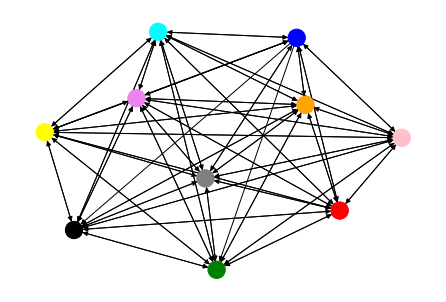

In [41]:
G = nx.from_pandas_edgelist(mydfrecv, 'Recipient_Display_Group', 'GroupName1', create_using=nx.DiGraph())
color_map=[]
for node in G:
    if node=="Administrative Staff":
        color_map.append('red')
    elif node=="Assistant Manager":
        color_map.append('green')
    elif node=="Director":
        color_map.append('grey')
    elif node=="Manager":
        color_map.append('yellow')
    elif node=="Junior Staff":
        color_map.append('black')
    elif node=="Partner":
        color_map.append('orange')
    elif node=="Senior":
        color_map.append('pink')
    elif node=="Senior Manager":
        color_map.append('violet')
    elif node=="Staff":
        color_map.append('cyan')
    else:
        color_map.append('blue')
nx.draw(G,node_color=color_map, pos=nx.spring_layout(G))
#plt.show()

In [15]:
Gemployees = nx.from_pandas_edgelist(mydfrecv, 'Recipient_Display_ID', 'Id_Recipient', create_using=nx.DiGraph())
#nx.draw(Gemployees,pos=nx.spring_layout(Gemployees))
#plt.show()

In [12]:
#building matrix considering only one way of emails
mydf[(mydf.Id_Direction == "2") ] #considering only one way of emails
#rn recv
#rd sent

GroupName1            MessSize             MessDate  \
49           Staff  0,0611381530761719  04/03/2019 00:01:04   
61          Senior  0,0477132797241211  04/03/2019 00:03:15   
68           Staff  0,0630598068237305  04/03/2019 00:04:14   
92           Staff   0,152921676635742  04/03/2019 00:09:48   
126        Manager  0,0189065933227539  04/03/2019 00:25:38   
...            ...                 ...                  ...   
1174912      Staff    11,3276977539063  19/03/2019 23:58:42   
1174915      Staff    57,3246335983276  19/03/2019 23:58:46   
1174920      Staff    10,5279741287231  19/03/2019 23:59:03   
1174923      Staff    10,0752859115601  19/03/2019 23:59:33   
1174926      Staff    5,77865791320801  19/03/2019 23:59:40   

                                          Subject Id_Direction  \
49       0e567ffc71c136761387febb8c869026fe1d01f3            2   
61       4bb26edab1c7a7bd212a86e4308d128af11e117c            2   
68       0e567ffc71c136761387febb8c869026fe1d01f3            2   
92       5bc03f2087131f307bd84cb143a90edbf0c26b2e            2   
126      1a33e8551a549e3fa7b20cfa23bc29b604257880            2   
...                                           ...          ...   
1174912  8854aa36e886ac05a2e3232b2bbbc5153061feb4            2   
1174915  9d231eecb9005c995281e7073656c524968da9e9            2   
1174920  d50150fe40834b36b3b00143a44bef8739eb83d1            2   
1174923  a87260372529cbefc1f1fcb98fa344b623d8872f            2   
1174926  e07e8cec7f1fa3a230c8602bbad0bb04a4014514            2   

        PartnerTypeName Id_Recipient Id_Regroup  \
49             Internal      1336894    1336894   
61             Internal          719        772   
68             Internal      1336894    1336894   
92             Internal      1336894    1336894   
126            Internal         1052    1378156   
...                 ...          ...        ...   
1174912        Internal      1173723       1685   
1174915        Internal      1173723       1685   
1174920        Internal      1173723       1685   
1174923        Internal      1173723       1685   
1174926        Internal      1173723       1685   

                                     Partner_Name  \
49       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
61       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
68       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
92       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
126      f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
...                                           ...   
1174912  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174915  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174920  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174923  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174926  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   

                                Recipient_Display  \
49       ae480cf987c8c8b1c3430d66359f67d838ce462f   
61       031c2220cade22cd67b6ec200668e1c86f570889   
68       ae480cf987c8c8b1c3430d66359f67d838ce462f   
92       ae480cf987c8c8b1c3430d66359f67d838ce462f   
126      28dca38ae2c42d2855a4ef794cb95f6e12350b2e   
...                                           ...   
1174912  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174915  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174920  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174923  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174926  27a0dafd0101f368a5881378aef66a1fa5403e38   

                                   Recipient_Name Recipient_Display_Group  \
49       ae480cf987c8c8b1c3430d66359f67d838ce462f                   Staff   
61       665751c47b55cb0f3c4fc9376db0c3c7109f8d99                 Manager   
68       ae480cf987c8c8b1c3430d66359f67d838ce462f                   Staff   
92       ae480cf987c8c8b1c3430d66359f67d838ce462f                   Staff   
126      bbcb57c9587cd21bf0df0b9210cf631dd600f03d            Junior Staff   
...                                           ...                     ...   
1174912  ab721267b844d2c55730b7c

In [13]:
# removing GroupName1 != "Title:[no value]  
ddd= mydf[(mydf.GroupName1 != "Title:[no value]") ]  
#rn recv
#rd sent

In [222]:
#validation
ddd['GroupName1'].value_counts()  

Staff                   129872
Senior                   90436
Manager                  81487
Partner                  64042
Senior Manager           61297
Director                 42605
Administrative Staff     32144
Junior Staff             13234
Assistant Manager         7594
Name: GroupName1, dtype: int64

In [14]:
dfz = ddd[['Id_Recipient','Recipient_Display',]].groupby(["Id_Recipient"], as_index=False).count()
dfz

Id_Recipient  Recipient_Display
0            1000                147
1            1001                294
2            1003                241
3            1005                341
4            1006                 68
...           ...                ...
1532       999593                190
1533       999594                345
1534       999603                399
1535       999604                120
1536       999609                501

[1537 rows x 2 columns]

In [15]:
list_all=[]

for row in dfz.iterrows():
    id_recv=int(str(row[1]).replace(" ","").split("\n")[0].replace("Id_Recipient",""))
    #print(str(row[1]).replace(" ","").split("\n")[1].replace("Recipient_Display",""))
    count_id_recv=int(str(row[1]).replace(" ","").split("\n")[1].replace("Recipient_Display",""))
    
    onlydf=mydf[['Id_Recipient','Recipient_Display_ID']]
    
    dfx= onlydf[(onlydf.Id_Recipient==str(id_recv))].groupby(["Recipient_Display_ID"], as_index=False).count()
    c=0
    for row in dfx.iterrows():
        c+=1
        id_sender=int(str(row[1]).replace(" ","").split("\n")[0].replace("Recipient_Display_ID",""))
        
        count_id=int(str(row[1]).replace(" ","").split("\n")[1].replace("Id_Recipient",""))
        #print(id_sender, count_id)
        
        
        
        value=count_id/count_id_recv
        p=[id_sender, id_recv, value]
        list_all.append(p)

In [19]:
print(list_all)
#has item in form of id_sender, id_recv, the fraction
#convert this into matrix

[[940, 1000, 0.02040816326530612], [994, 1000, 0.013605442176870748], [995, 1000, 0.2108843537414966], [996, 1000, 0.047619047619047616], [997, 1000, 0.047619047619047616], [1000, 1000, 0.32653061224489793], [1001, 1000, 0.02040816326530612], [1003, 1000, 0.013605442176870748], [1005, 1000, 0.02040816326530612], [1007, 1000, 0.02040816326530612], [1008, 1000, 0.013605442176870748], [1010, 1000, 0.047619047619047616], [1011, 1000, 0.05442176870748299], [1629, 1000, 0.006802721088435374], [1845, 1000, 0.006802721088435374], [847990, 1000, 0.006802721088435374], [971458, 1000, 0.11564625850340136], [1620429, 1000, 0.006802721088435374], [940, 1001, 0.01020408163265306], [994, 1001, 0.006802721088435374], [995, 1001, 0.023809523809523808], [996, 1001, 0.03741496598639456], [997, 1001, 0.06462585034013606], [1000, 1001, 0.01020408163265306], [1001, 1001, 0.30952380952380953], [1003, 1001, 0.003401360544217687], [1005, 1001, 0.19047619047619047], [1006, 1001, 0.003401360544217687], [1007, 10

In [16]:
#creating a data frame 
df_1 = pd.DataFrame(list_all)
df_1.columns = ['id_sender', 'id_recv', 'fraction']
df_1

id_sender  id_recv  fraction
0            940     1000  0.020408
1            994     1000  0.013605
2            995     1000  0.210884
3            996     1000  0.047619
4            997     1000  0.047619
...          ...      ...       ...
63338    1432675   999609  0.001996
63339    1534308   999609  0.001996
63340    1545223   999609  0.001996
63341    1620429   999609  0.001996
63342    1661918   999609  0.015968

[63343 rows x 3 columns]

Creating the graph 

In [17]:
#creating the graph with id_sender, id_recv
G_2_emp = nx.from_pandas_edgelist(df_1, 'id_sender', 'id_recv', create_using=nx.DiGraph())
G_2_emp

### EXPERIMENTS 

### Cluster
 

In [256]:
#pre treatement- adj matrix 
graphs=[G_2_emp]
G_p1=graphs[0]
A=nx.adjacency_matrix(G_p1)
print(A.todense())

[[0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [257]:
#pre treatement- laplacian matrix 
L = nx.directed_laplacian_matrix(G_p1).astype(float)
print(L)

[[           1.000           -0.000           -0.000 ...           -0.000           -0.000           -0.000]
 [          -0.000            0.947           -0.040 ...           -0.000           -0.000           -0.000]
 [          -0.000           -0.040            0.969 ...           -0.000           -0.000           -0.000]
 ...
 [          -0.000           -0.000           -0.000 ...            0.050           -0.000           -0.000]
 [          -0.000           -0.000           -0.000 ...           -0.000            1.000           -0.000]
 [          -0.000           -0.000           -0.000 ...           -0.000           -0.000            1.000]]


In [258]:
#Decomposition :Compute eigenvalues and eigenvectors of the Laplacian Matrix, 
import scipy as sp 
w,v = sp.sparse.linalg.eigsh(L, k = 3, which='SM')
print(w)
print(v)

[          -0.000            0.050            0.085]
[[          -0.006            0.000           -0.001]
 [          -0.017            0.000           -0.007]
 [          -0.020            0.000           -0.008]
 ...
 [          -0.025           -1.000           -0.001]
 [          -0.006            0.000            0.006]
 [          -0.006            0.000            0.006]]


In [259]:
#cluster 
from sklearn.cluster import KMeans

X = v*w
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_


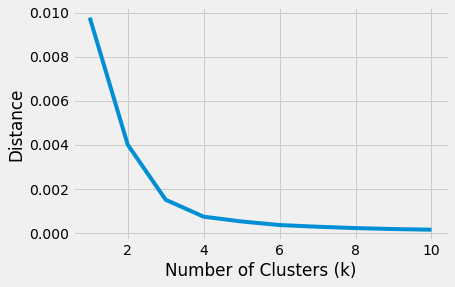

In [260]:
# optimal number of clusters - silhouette :
import matplotlib.style as style
range_n_clusters = [1, 2, 3, 4, 5, 6,7,8,9,10]
avg_distance=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

In [18]:
# fintering data frame 
xxx = ddd[['Id_Recipient','GroupName1']]

### Communities detection



In [19]:
G_social = G_2_emp.to_undirected()

In [20]:
#calculating communities
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)


6

Colours for each community created 

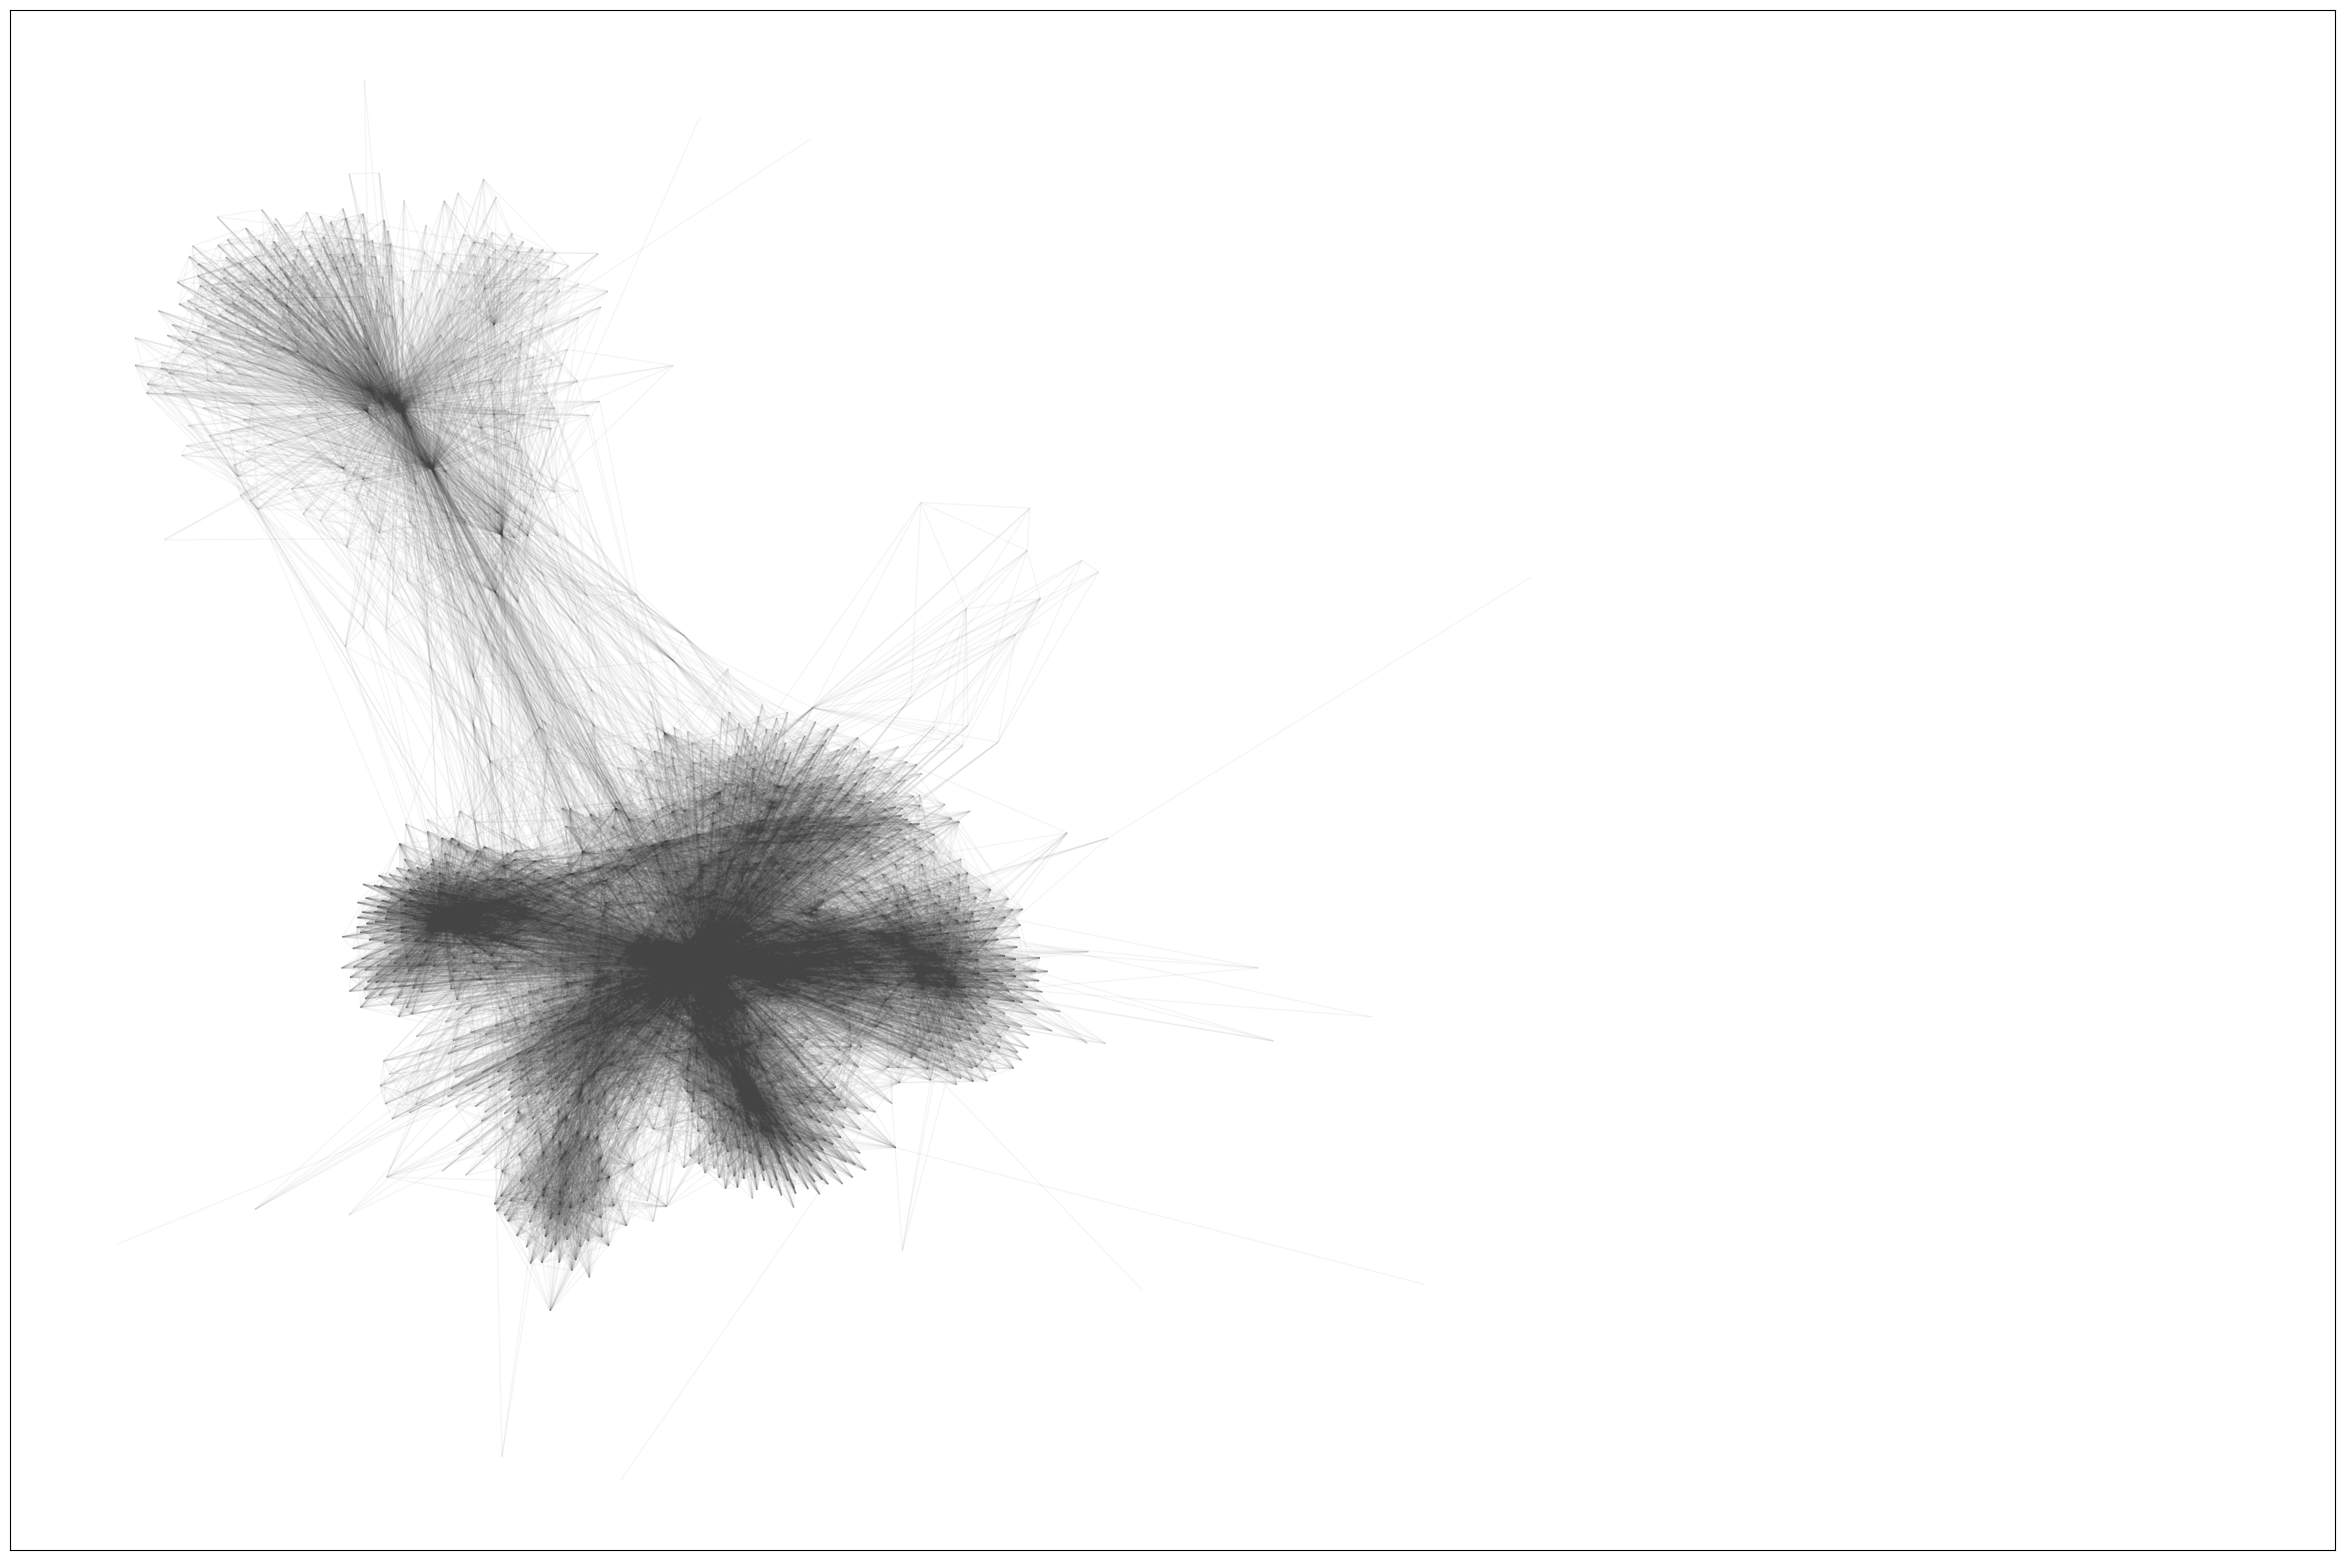

In [359]:
#graph network
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (30, 20)})
nx.draw_networkx(
        G_social,
        pos=pos,
        node_size=0,
        edge_color="#444444",
        alpha=0.05,
        with_labels=False)

In [310]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)

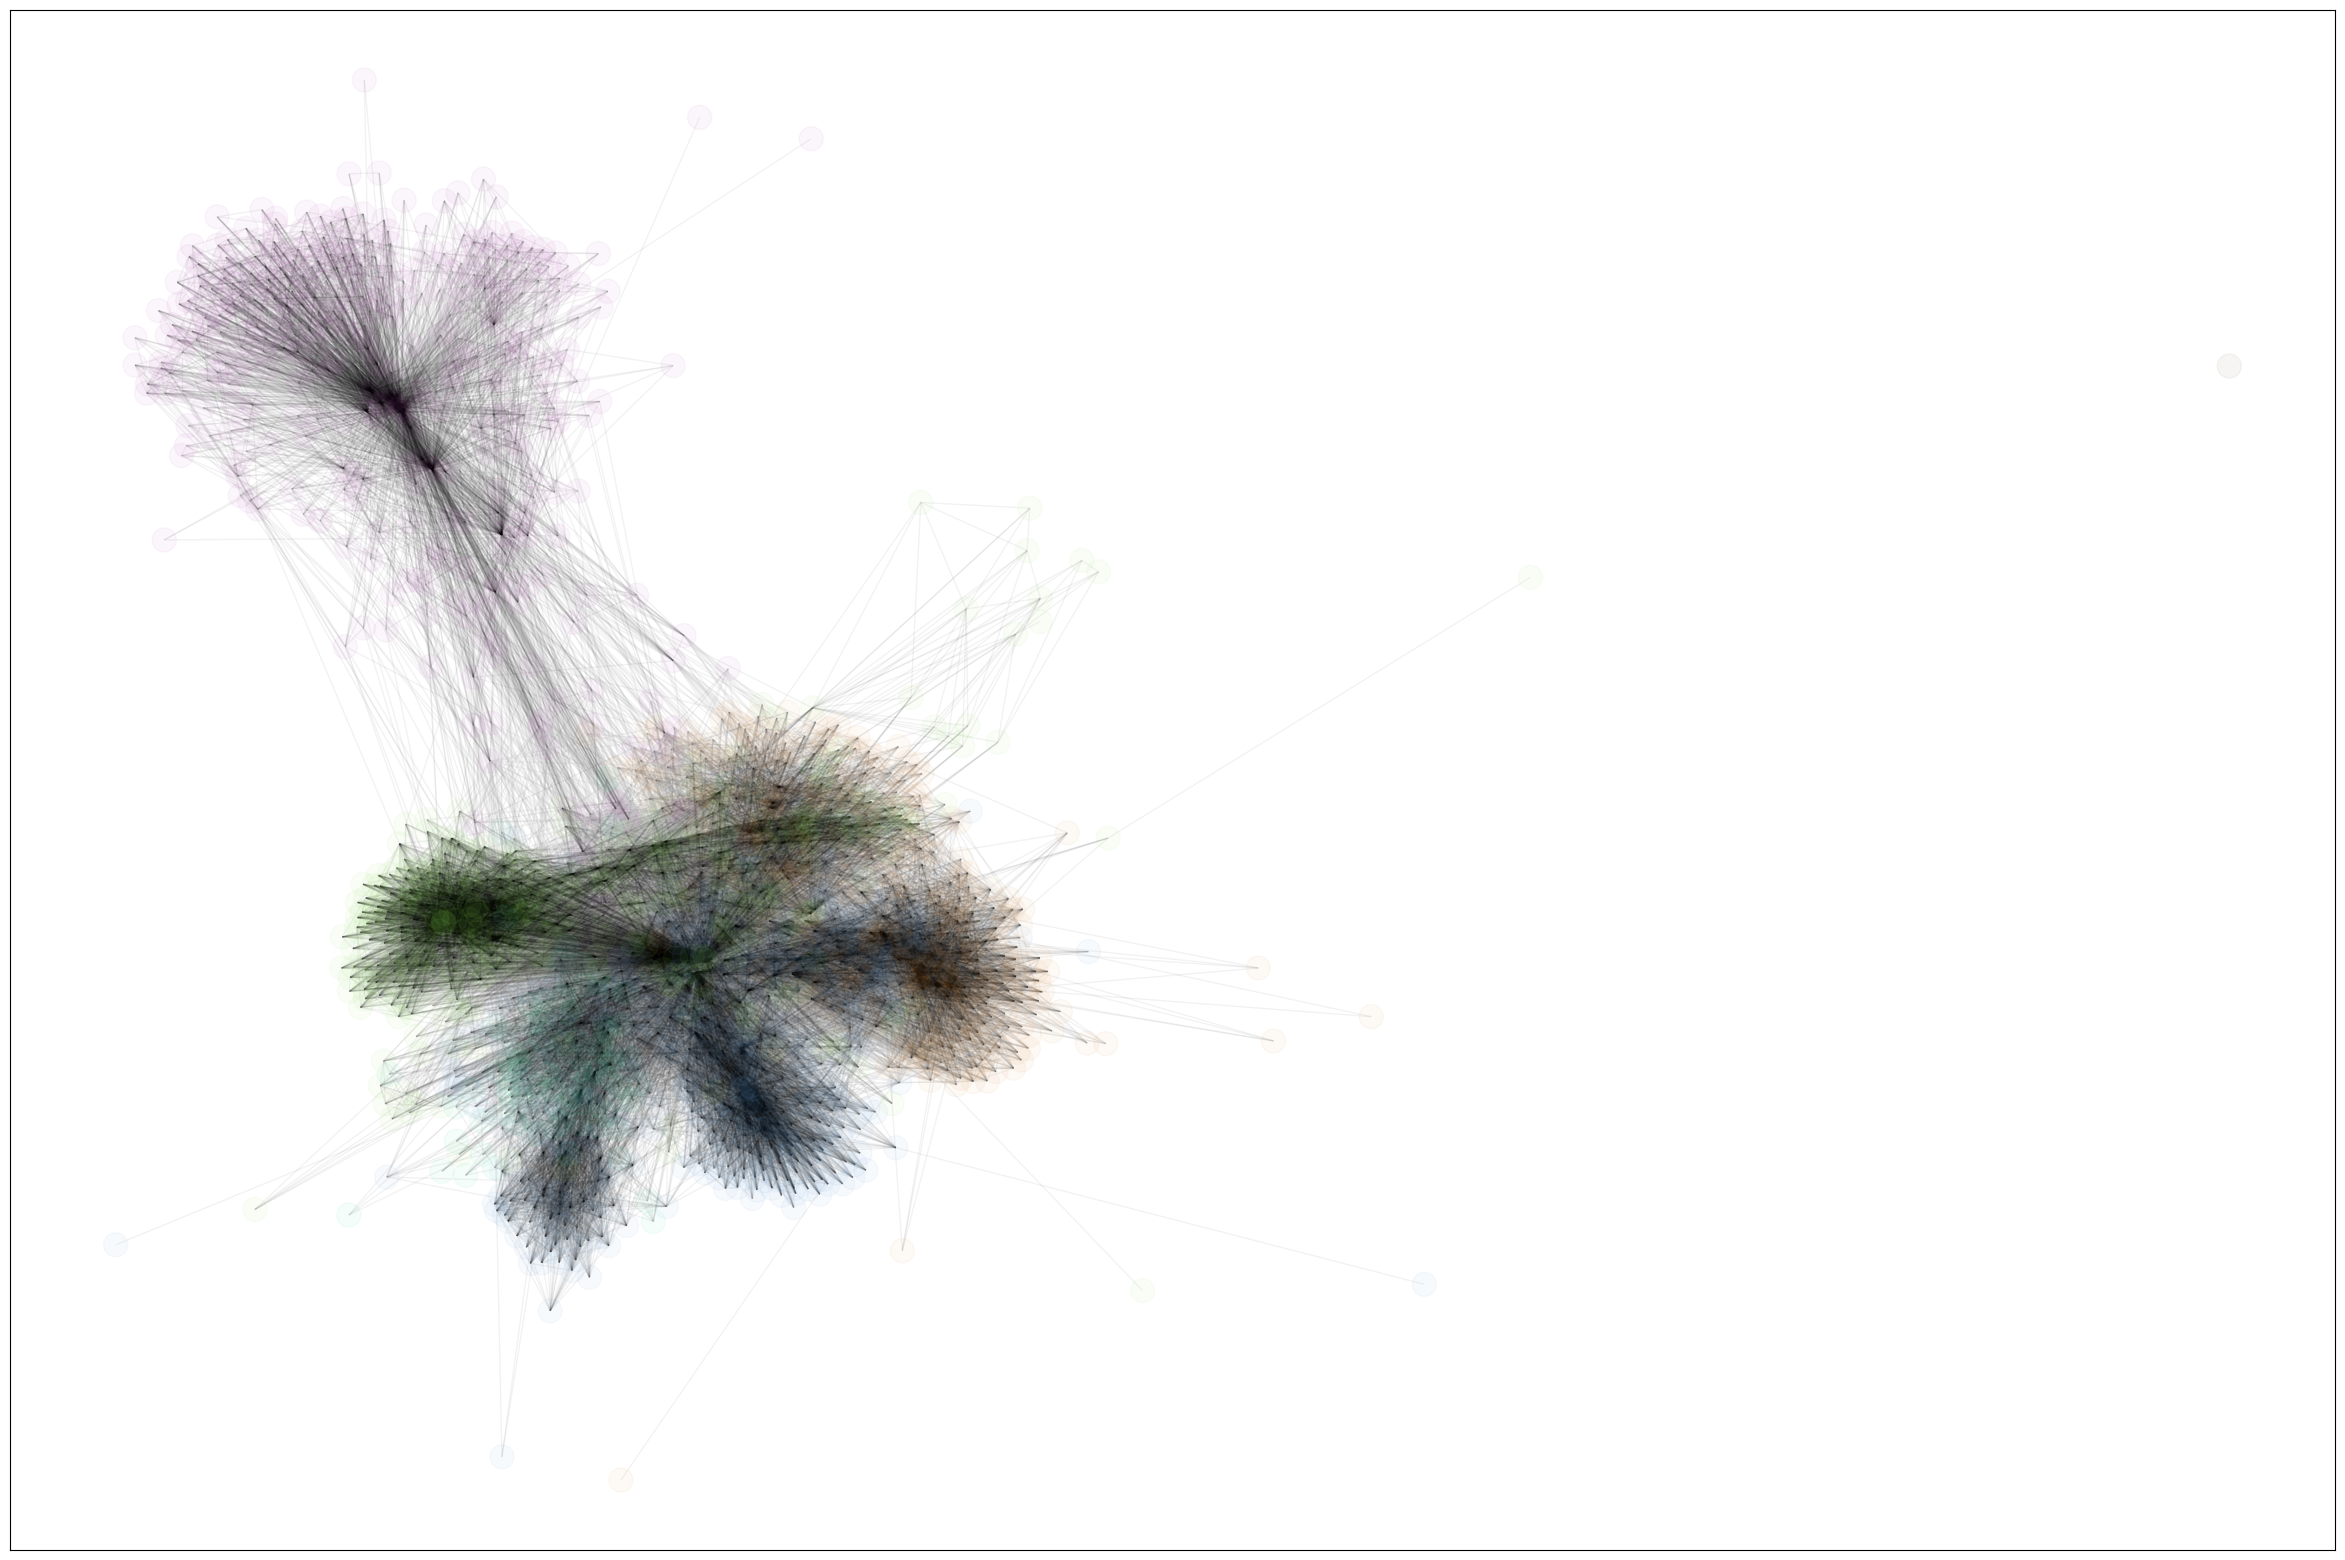

In [360]:
#print communities graph with colors

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (30, 20)})
#plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)
# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
# external edges
nx.draw_networkx(
        G_social,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color="silver",
        node_color=node_color,
        alpha=0.2,
        with_labels=False)
    # internal edges
nx.draw_networkx(
        G_social, pos=pos,
        edgelist=internal,
        edge_color=internal_color,
        node_color=node_color,
        alpha=0.05,
        with_labels=False)

### K- Core 

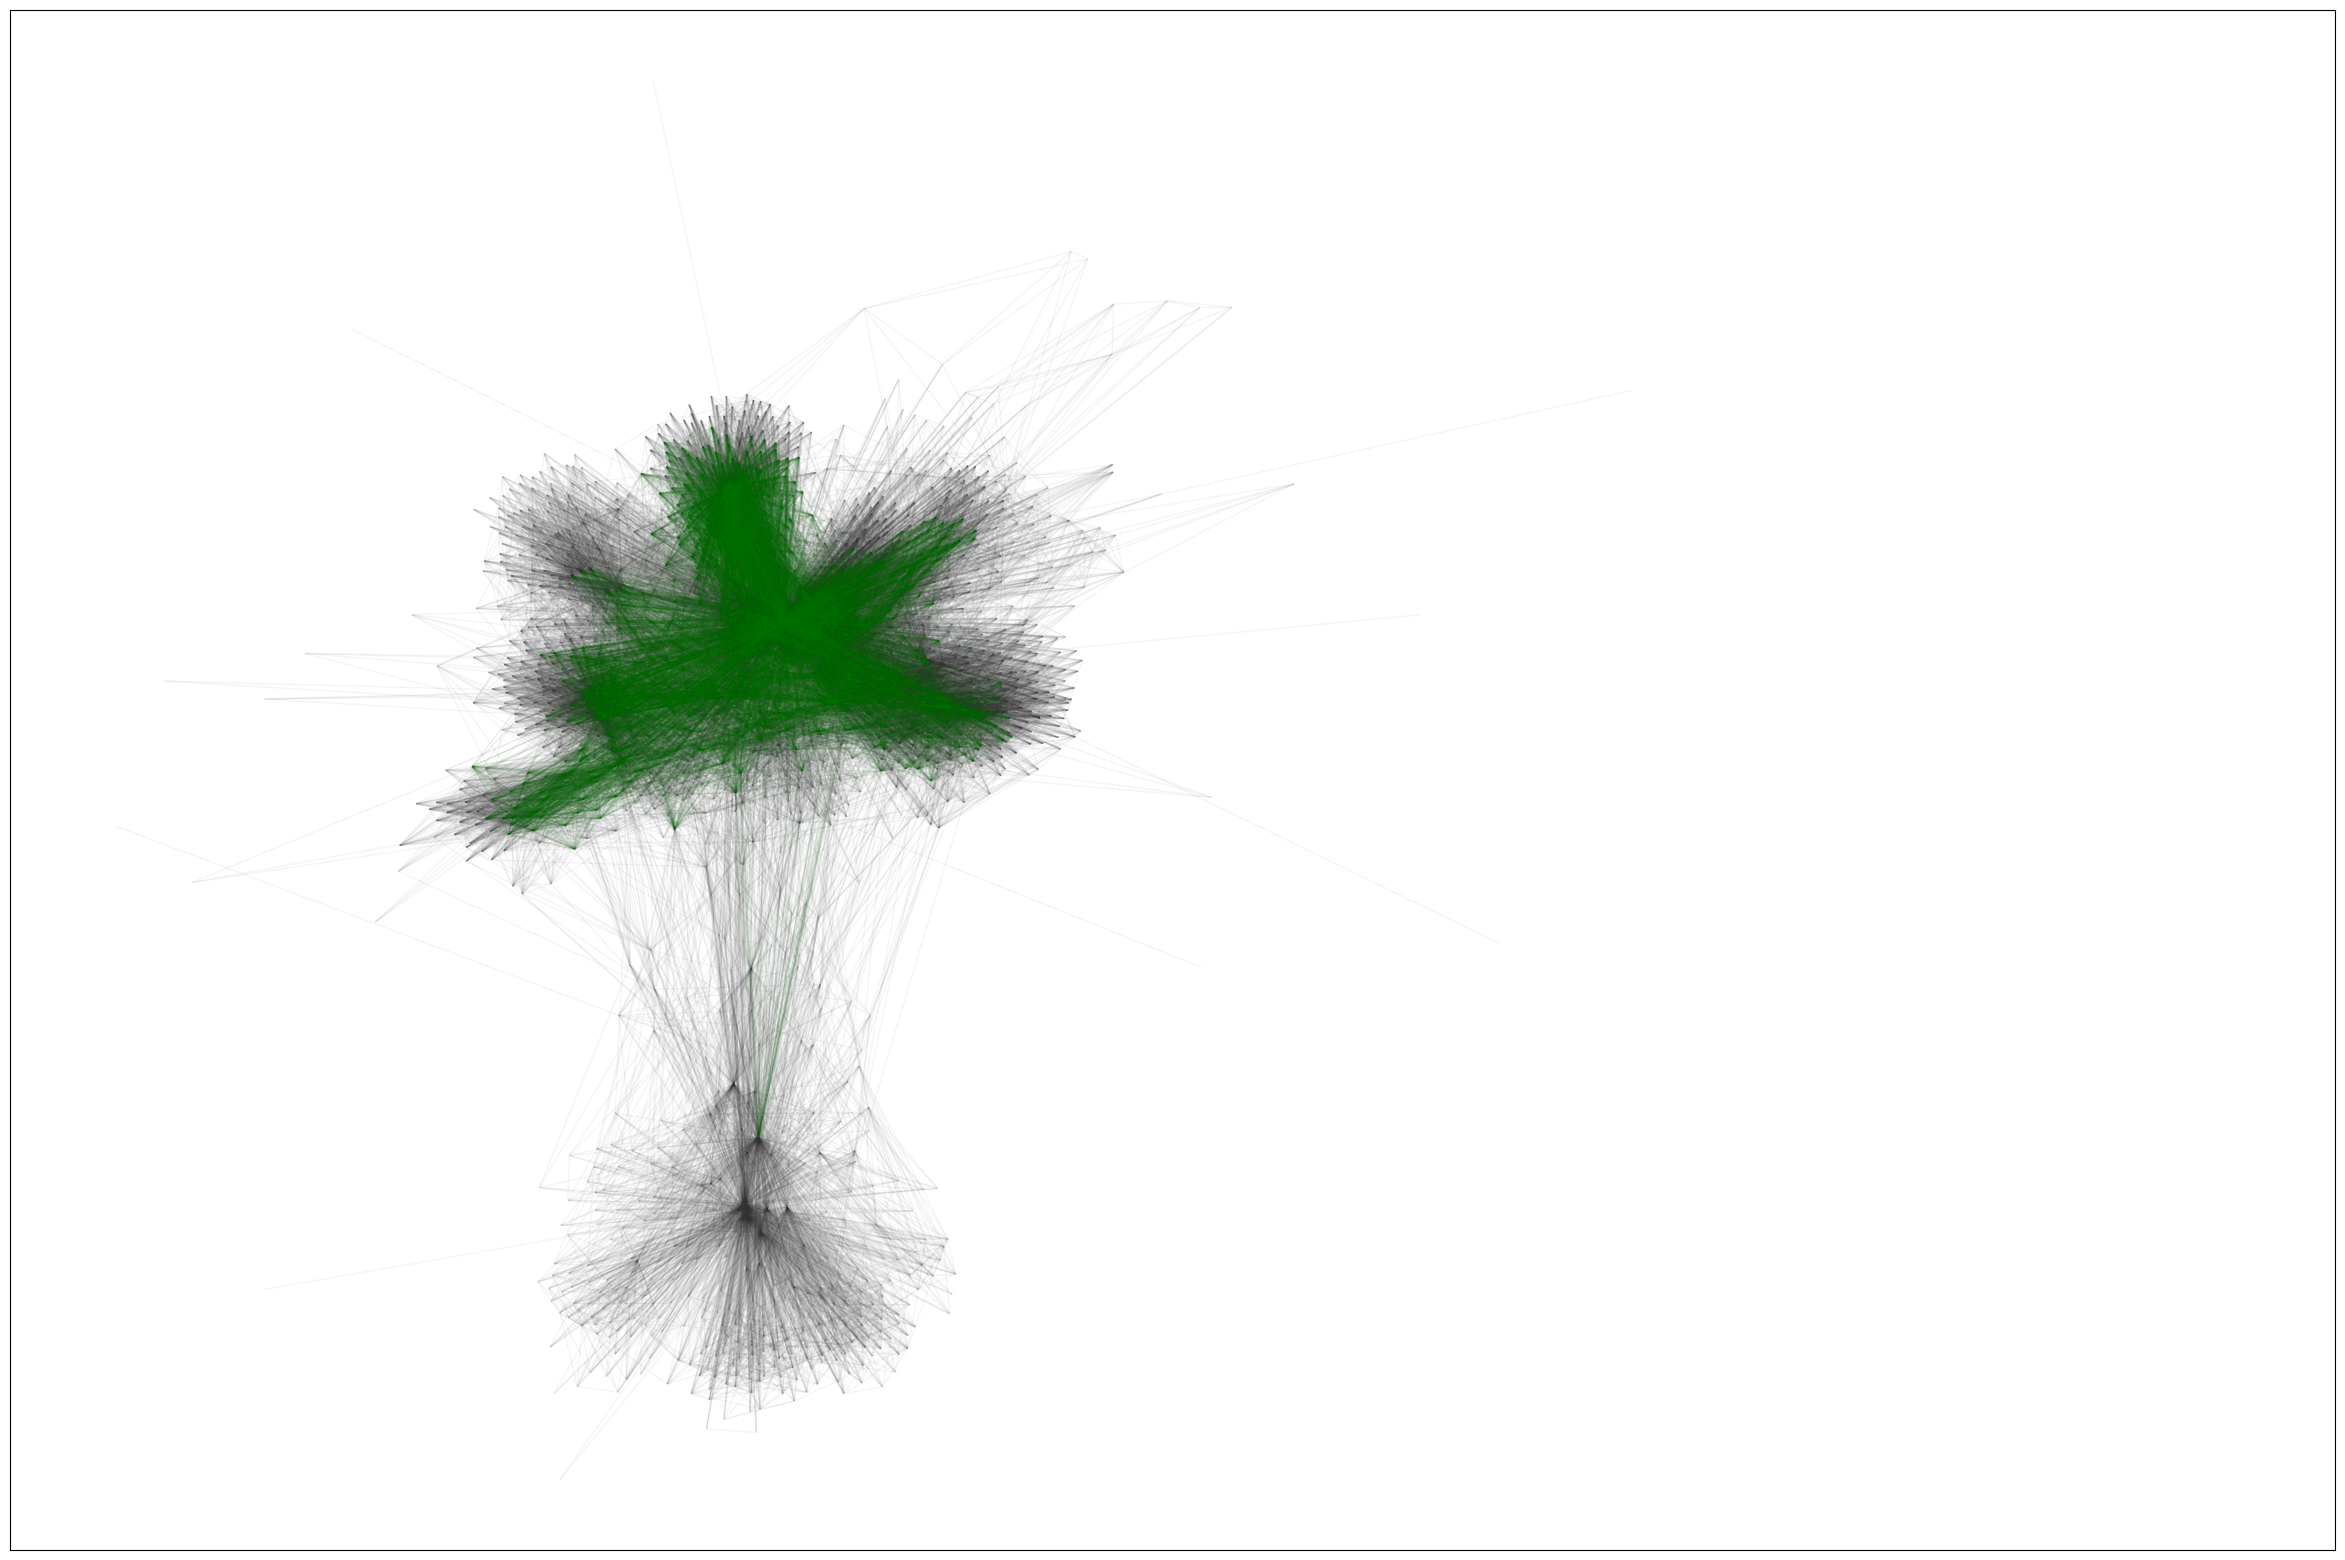

In [361]:
G_social.remove_edges_from(nx.selfloop_edges(G_social)) #removing self modularity 
    
    # cores with at lest degree 30
    G_core_30 = nx.k_core(G_social, 30)
    # similarly, with at least degree 60
    G_core_60 = nx.k_core(G_social, 60)
    # Visualize network and k-cores
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'figure.figsize': (30, 20)})
   # plt.style.use('dark_background')
    pos = nx.spring_layout(G_social, k=0.1)
    nx.draw_networkx(
        G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
    nx.draw_networkx(
        G_core_30, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
    nx.draw_networkx(
        G_core_60, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)

### Modularity

In [21]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G_social, modularity_dict, 'modularity')

In [378]:
modularity_dict

{16387: 0,
 1628164: 0,
 1601557: 0,
 1855542: 0,
 997463: 0,
 997471: 0,
 1624216: 0,
 1822874: 0,
 999582: 0,
 999583: 0,
 999584: 0,
 999603: 0,
 6340: 0,
 1845444: 0,
 1738993: 0,
 4404: 0,
 1667382: 0,
 2370: 0,
 1169754: 0,
 1534304: 0,
 1534305: 0,
 1534309: 0,
 979302: 0,
 979303: 0,
 1534310: 0,
 1534336: 0,
 979345: 0,
 979371: 0,
 1839535: 0,
 1862075: 0,
 1726912: 0,
 1620426: 0,
 1620429: 0,
 1800672: 0,
 975337: 0,
 1796591: 0,
 975373: 0,
 1008147: 0,
 1008148: 0,
 1008150: 0,
 1008163: 0,
 1657379: 0,
 1008173: 0,
 975406: 0,
 1589811: 0,
 1008183: 0,
 1151580: 0,
 1784422: 0,
 1151596: 0,
 1014423: 0,
 1014426: 0,
 1014428: 0,
 1788592: 0,
 975538: 0,
 975542: 0,
 975546: 0,
 1014458: 0,
 971465: 0,
 1483512: 0,
 1483514: 0,
 1526595: 0,
 1601527: 0,
 1764205: 0,
 892: 0,
 905: 0,
 959: 0,
 969: 0,
 17357: 0,
 982: 0,
 13278: 0,
 13280: 0,
 13282: 0,
 13285: 0,
 13286: 0,
 13289: 0,
 13290: 0,
 1702891: 0,
 1702892: 0,
 13292: 0,
 13296: 0,
 1545209: 0,
 13305: 0,
 957

size of each community

In [22]:
import operator
from operator import itemgetter

# First get a list of just the nodes in that class
class0 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 0]
class1 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 1]
class2 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 2]
class3 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 3]
class4 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 4]
class5 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 5]


In [29]:
sizeOfDemoList = len(class5)
sizeOfDemoList

1

 ### calculating centrality measure inside each communities

In [399]:
degree_dict = nx.degree_centrality(G_social) # Run degree centrality
closeness_dict = nx.closeness_centrality(G_social) # Run closeness  centrality
betweenness_dict  = nx.betweenness_centrality(G_social) # Run eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G_social) # Run eigenvector centrality


# Assign each to an attribute in your network
nx.set_node_attributes(G_social, degree_dict, 'degree')
nx.set_node_attributes(G_social, closeness_dict, 'closeness_cent')
nx.set_node_attributes(G_social, betweenness_dict, 'betweenness')
nx.set_node_attributes(G_social, eigenvector_dict, 'eigenvector')


centrality measures into community class 0

In [427]:
import operator
from operator import itemgetter

# First get a list of just the nodes in that class
class0 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 5]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G_social.nodes[n]['degree'] for n in class0}

#Then sort that dictionary and print the first 5 results

class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by degree Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
   # print("Name:", node[0], "| degree Centrality:", node[1])
   print( node[0] )

Modularity Class 0 Sorted by degree Centrality:
1774929


In [433]:
import operator
from operator import itemgetter

# First get a list of just the nodes in that class
class0 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 5]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G_social.nodes[n]['eigenvector'] for n in class0}

#Then sort that dictionary and print the first 5 results

class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
  # print("Name:", node[0], "| degree Centrality:", node[1])
   print( node[0] )

Modularity Class 0 Sorted by Eigenvector Centrality:
1774929


In [429]:
import operator
from operator import itemgetter

# First get a list of just the nodes in that class
class0 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 5]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G_social.nodes[n]['closeness_cent'] for n in class0}

#Then sort that dictionary and print the first 5 results

class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by closeness Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
# print("Name:", node[0], "| degree Centrality:", node[1])
   print( node[0] )

Modularity Class 0 Sorted by closeness Centrality:
1774929


In [430]:

# First get a list of just the nodes in that class
class0 = [n for n in G_social.nodes() if G_social.nodes[n]['modularity'] == 5]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G_social.nodes[n]['betweenness'] for n in class0}

#Then sort that dictionary and print the first 5 results

class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by betweenness Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
# print("Name:", node[0], "| degree Centrality:", node[1])
   print( node[0] )

Modularity Class 0 Sorted by betweenness Centrality:
1774929


### Idenfity roles from 5 higest measures into communities

In [436]:
# idenfity roles  
role_0 = xxx[xxx.Id_Recipient.isin(['1620429','13338','1558135','1758','1238','1178','13468','1815','1354'])]
role_0.groupby(['Id_Recipient', 'GroupName1']).size()

Id_Recipient  GroupName1          
1178          Administrative Staff    2682
1238          Staff                    230
13338         Staff                    670
13468         Partner                 1364
1354          Partner                 1302
1558135       Senior                  1046
1620429       Partner                 1816
1758          Staff                    310
1815          Administrative Staff    1524
dtype: int64

In [437]:
 role_1 = xxx[xxx.Id_Recipient.isin(['1629',
'1683',
'940',
'13269',
'13342',
'1056',
'885',
'1299',
'1920'
])]
role_1.groupby(['Id_Recipient', 'GroupName1']).size()

Id_Recipient  GroupName1       
1056          Partner              1564
1299          Manager               364
13342         Staff                 966
1629          Director             3165
1683          Assistant Manager    4907
1920          Senior               1332
885           Senior Manager        575
dtype: int64

In [438]:
 role_2 = xxx[xxx.Id_Recipient.isin(['1331',
'865',
'979304',
'737',
'709',
'1441',
'1124',
'853',
'1886',
'1273',
'694',
'880',
'13215'])]
role_2.groupby(['Id_Recipient', 'GroupName1']).size()

Id_Recipient  GroupName1          
1124          Director                 502
1273          Partner                  606
13215         Staff                    461
1331          Partner                 2144
1441          Administrative Staff     570
1886          Administrative Staff     633
694           Staff                    702
709           Senior                   611
737           Senior                   738
853           Senior                   534
865           Manager                 1649
880           Senior                   321
979304        Manager                  945
dtype: int64

In [442]:
 role_3 = xxx[xxx.Id_Recipient.isin(['1428',
'1513',
'1499',
'1171010',
'16092',
'1501',
'1580',
'1520'])]
role_3.groupby(['Id_Recipient', 'GroupName1']).size()

Id_Recipient  GroupName1          
1171010       Senior                   835
1428          Partner                 1945
1499          Senior Manager           851
1501          Administrative Staff    1781
1513          Manager                 1574
1520          Senior                  1420
1580          Administrative Staff     851
16092         Senior Manager           874
dtype: int64

In [443]:
 role_4 = xxx[xxx.Id_Recipient.isin(['1405828'
'1677',
'1316',
'1179',
'1180',
'1905',
'1609',
'1620423',
'1888'
])]
role_4.groupby(['Id_Recipient', 'GroupName1']).size()

Id_Recipient  GroupName1    
1179          Senior Manager    526
1180          Senior Manager    910
1316          Director          784
1609          Manager           328
1620423       Manager           115
1888          Partner           205
1905          Partner           892
dtype: int64